# Random Forest Model 

## Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## 1. Data

### Load the Dataset

In [2]:
df = pd.read_csv('Preprocessing_pipeline/combined_data.csv')

### Shape of the dataset now


In [3]:
print("Shape of the data set: ", df.shape)

Shape of the data set:  (480, 25)


### Plot number of people for each target

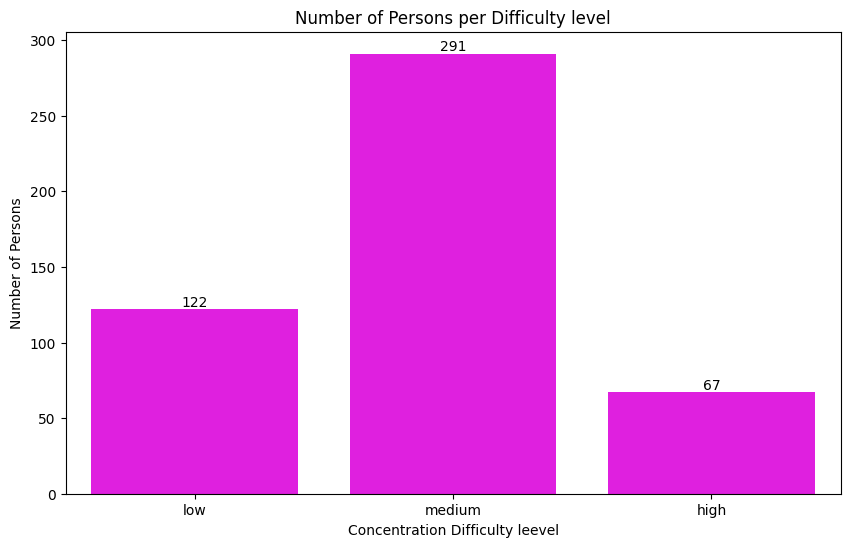

In [4]:
# Step 1: Count the occurrences of each category in the 'Sex' column
difficulty_levels = df['Difficulty_level'].value_counts().sort_index()

# Step 2: Create a mapping for category labels
category_labels = {
    0: 'low',
    1: 'medium',
    2: 'high',
}

# Step 3: Map the numerical values to category names for the x-axis labels
difficulty_levels.index = difficulty_levels.index.map(category_labels)

# Step 4: Plot the bar chart with a proper figure size
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x=difficulty_levels.index, y=difficulty_levels.values, color='magenta')

# Step 5: Add annotations on top of the bars
for index, value in enumerate(difficulty_levels.values):
    bar_plot.text(index, value, str(value), ha='center', va='bottom')

# Step 6: Set the labels and title
plt.xlabel('Concentration Difficulty leevel')
plt.ylabel('Number of Persons')
plt.title('Number of Persons per Difficulty level')

# Step 7: Show the plot
plt.show()

### Features


In [5]:
# Initialize lists to hold the table data
feature_index = []
feature_name = []
categories = []
num_categories = []

# Iterate over each column to extract the required information
for idx, col in enumerate(df.columns):
    
    unique_categories = df[col].unique()
    feature_index.append(idx)
    feature_name.append(col)
    # if col == 'Platforms Used':
    #     categories.append(", ".join(map(str, social_media_platforms)))
    # else:
    categories.append(", ".join(map(str, unique_categories)))
    # if col == 'Platforms Used':
    #     num_categories.append(len(social_media_platforms))
    # else:
    num_categories.append(len(unique_categories))

# Create the resulting DataFrame
table_for_num_of_categories_2 = pd.DataFrame({
    'Feature Index': feature_index,
    'Feature': feature_name,
    'Categories': categories,
    'Number of Categories': num_categories
})

# Display the DataFrame using the display function
from IPython.display import display

# Set the maximum width of the display to make it horizontally scrollable
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.width', 1000)

# Set the maximum column width to display all data in each cell
pd.set_option('display.max_colwidth', None)

# Display the DataFrame
display(table_for_num_of_categories_2)

,Feature Index,Feature,Categories,Number of Categories
0,0,Age,"24, 46, 30, 56, 19, 21, 47, 23, 20, 25, 26, 65, 52, 35, 22, 44, 17, 60, 34, 48, 27, 36, 29, 32, 18, 42, 31, 50, 37, 69, 28, 14, 16, 43, 38, 40, 91, 51, 49, 15, 55, 13, 33, 53, 45",45
1,1,Sex,"0, 1, 2",3
2,2,Relationship Status,"1, 2, 0, 3",4
3,3,Occupation,"2, 3, 1, 0",4
4,4,Social Media User?,"1, 0",2
5,5,Time Spent,"2, 0, 4, 1, 5, 3",6
6,6,Q1,"3, 2, 1, 4, 5",5
7,7,Q2,"3, 1, 4, 5, 2",5
8,8,Q3,"2, 1, 4, 3, 5",5
9,9,Q4,"2, 1, 3, 4, 5",5


### Number of features I will have after one-hot encoding

In [6]:
print("Number of features after one-hot encoding: ", sum(num_categories) - num_categories[0] + 1 - 11)
# -num_categories[0] + 1 : Because age is a continuous variable

Number of features after one-hot encoding:  72


## 2. One-hot encoding

### Define the variables for one-hot encode

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Age                  480 non-null    int64
 1   Sex                  480 non-null    int64
 2   Relationship Status  480 non-null    int64
 3   Occupation           480 non-null    int64
 4   Social Media User?   480 non-null    int64
 5   Time Spent           480 non-null    int64
 6   Q1                   480 non-null    int64
 7   Q2                   480 non-null    int64
 8   Q3                   480 non-null    int64
 9   Q4                   480 non-null    int64
 10  Q5                   480 non-null    int64
 11  Q6                   480 non-null    int64
 12  Q7                   480 non-null    int64
 13  Q8                   480 non-null    int64
 14  Difficulty_level     480 non-null    int64
 15  Facebook             480 non-null    int64
 16  Instagram            480 n

In [8]:
cat_variables = ['Sex', 'Relationship Status', 'Occupation', 'Time Spent', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8']    
print(cat_variables)

['Sex', 'Relationship Status', 'Occupation', 'Time Spent', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8']


### Apply pandas pd.get_dummies function to one-hot encode

- data: data frame(data)
- prefix: A list of prefixes(cat_variables)
- columns: A list of columns that will be one hot encoded(cat_variables)

In [9]:
# This will replace the columns with the one-hot encoded ones and keep the columns outside 'columns' argument as it is.
features = pd.get_dummies(data = df, prefix=cat_variables, columns=cat_variables)

features.head()

# How many coluns now
print("Number of columns after one-hot encoding before encode 'platforms used?': ", len(features.columns))

Number of columns after one-hot encoding before encode 'platforms used?':  70


In [10]:
features.head()

,Age,Social Media User?,Difficulty_level,Facebook,Instagram,YouTube,Snapchat,Twitter,Discord,Reddit,Pinterest,TikTok,is_train,Sex_0,Sex_1,Sex_2,Relationship Status_0,Relationship Status_1,Relationship Status_2,Relationship Status_3,Occupation_0,Occupation_1,Occupation_2,Occupation_3,Time Spent_0,Time Spent_1,Time Spent_2,Time Spent_3,Time Spent_4,Time Spent_5,Q1_1,Q1_2,Q1_3,Q1_4,Q1_5,Q2_1,Q2_2,Q2_3,Q2_4,Q2_5,Q3_1,Q3_2,Q3_3,Q3_4,Q3_5,Q4_1,Q4_2,Q4_3,Q4_4,Q4_5,Q5_1,Q5_2,Q5_3,Q5_4,Q5_5,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,Q7_1,Q7_2,Q7_3,Q7_4,Q7_5,Q8_1,Q8_2,Q8_3,Q8_4,Q8_5
0,24,1,0,1,1,1,0,1,0,0,0,0,1,True,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False
1,46,1,0,1,0,1,0,0,0,0,0,0,1,True,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False
2,30,1,1,1,1,0,0,0,0,0,0,0,1,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False
3,56,1,0,0,0,1,0,0,0,0,0,0,1,False,True,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False
4,19,1,1,1,1,1,0,0,0,0,0,1,1,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False


### Make Every feature True or False

In [11]:
# Convert 'Yes' to True and 'No' to False
features['Social Media User?'] = features['Social Media User?'].replace({1: True, 0: False})
features['Facebook'] = features['Facebook'].replace({1: True, 0: False})
features['Instagram'] = features['Instagram'].replace({1: True, 0: False})
features['YouTube'] = features['YouTube'].replace({1: True, 0: False})
features['Snapchat'] = features['Snapchat'].replace({1: True, 0: False})
features['Twitter'] = features['Twitter'].replace({1: True, 0: False})
features['Discord'] = features['Discord'].replace({1: True, 0: False})
features['Reddit'] = features['Reddit'].replace({1: True, 0: False})
features['Pinterest'] = features['Pinterest'].replace({1: True, 0: False})
features['TikTok'] = features['TikTok'].replace({1: True, 0: False})
features.head()

/var/folders/v6/jvlsn67j71g102qybf_hsvxr0000gn/T/ipykernel_26027/149385090.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  features['Social Media User?'] = features['Social Media User?'].replace({1: True, 0: False})
/var/folders/v6/jvlsn67j71g102qybf_hsvxr0000gn/T/ipykernel_26027/149385090.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  features['Facebook'] = features['Facebook'].replace({1: True, 0: False})
/var/folders/v6/jvlsn67j71g102qybf_hsvxr0000gn/T/ipykernel_26027/149385090.py:4: FutureWarning: Downcasting behavior

,Age,Social Media User?,Difficulty_level,Facebook,Instagram,YouTube,Snapchat,Twitter,Discord,Reddit,Pinterest,TikTok,is_train,Sex_0,Sex_1,Sex_2,Relationship Status_0,Relationship Status_1,Relationship Status_2,Relationship Status_3,Occupation_0,Occupation_1,Occupation_2,Occupation_3,Time Spent_0,Time Spent_1,Time Spent_2,Time Spent_3,Time Spent_4,Time Spent_5,Q1_1,Q1_2,Q1_3,Q1_4,Q1_5,Q2_1,Q2_2,Q2_3,Q2_4,Q2_5,Q3_1,Q3_2,Q3_3,Q3_4,Q3_5,Q4_1,Q4_2,Q4_3,Q4_4,Q4_5,Q5_1,Q5_2,Q5_3,Q5_4,Q5_5,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,Q7_1,Q7_2,Q7_3,Q7_4,Q7_5,Q8_1,Q8_2,Q8_3,Q8_4,Q8_5
0,24,True,0,True,True,True,False,True,False,False,False,False,1,True,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False
1,46,True,0,True,False,True,False,False,False,False,False,False,1,True,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False
2,30,True,1,True,True,False,False,False,False,False,False,False,1,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False
3,56,True,0,False,False,True,False,False,False,False,False,False,1,False,True,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False
4,19,True,1,True,True,True,False,False,False,False,False,True,1,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False


### Removing target from the features

In [12]:
features.drop('Difficulty_level', axis=1, inplace=True)
print(features.shape)

(480, 69)


### Table to clarify every feature is a binary variable other than "Age"


In [13]:
# Initialize lists to hold the table data
feature_index_new = []
feature_name_new = []
categories_new = []
num_categories_new = []

# Iterate over each column to extract the required information
for idx, col in enumerate(features.columns):
    
    unique_categories = features[col].unique()
    feature_index_new.append(idx)
    feature_name_new.append(col)
    # if col == 'Platforms Used':
    #     categories_new.append(", ".join(map(str, social_media_platforms)))
    # else:
    categories_new.append(", ".join(map(str, unique_categories)))
    # if col == 'Platforms Used':
    #     num_categories_new.append(len(social_media_platforms))
    #else:
    num_categories_new.append(len(unique_categories))

# Create the resulting DataFrame
table_for_num_of_categories_new = pd.DataFrame({
    'Feature Index': feature_index_new,
    'Feature': feature_name_new,
    'Categories': categories_new,
    'Number of Categories': num_categories_new
})

# Display the DataFrame using the display function
from IPython.display import display

# Set the maximum width of the display to make it horizontally scrollable
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.width', 1000)

# Set the maximum column width to display all data in each cell
pd.set_option('display.max_colwidth', None)

# Display the DataFrame
display(table_for_num_of_categories_new)

,Feature Index,Feature,Categories,Number of Categories
0,0,Age,"24, 46, 30, 56, 19, 21, 47, 23, 20, 25, 26, 65, 52, 35, 22, 44, 17, 60, 34, 48, 27, 36, 29, 32, 18, 42, 31, 50, 37, 69, 28, 14, 16, 43, 38, 40, 91, 51, 49, 15, 55, 13, 33, 53, 45",45
1,1,Social Media User?,"True, False",2
2,2,Facebook,"True, False",2
3,3,Instagram,"True, False",2
4,4,YouTube,"True, False",2
5,5,Snapchat,"False, True",2
6,6,Twitter,"True, False",2
7,7,Discord,"False, True",2
8,8,Reddit,"False, True",2
9,9,Pinterest,"False, True",2


### Number of features after one-hot encoded

In [14]:
print("Number of columns after one-hot encoded: ", len(features.columns))

# Feature
features.head() 

# For check the data frame still preserved
#data.head()

Number of columns after one-hot encoded:  69


,Age,Social Media User?,Facebook,Instagram,YouTube,Snapchat,Twitter,Discord,Reddit,Pinterest,TikTok,is_train,Sex_0,Sex_1,Sex_2,Relationship Status_0,Relationship Status_1,Relationship Status_2,Relationship Status_3,Occupation_0,Occupation_1,Occupation_2,Occupation_3,Time Spent_0,Time Spent_1,Time Spent_2,Time Spent_3,Time Spent_4,Time Spent_5,Q1_1,Q1_2,Q1_3,Q1_4,Q1_5,Q2_1,Q2_2,Q2_3,Q2_4,Q2_5,Q3_1,Q3_2,Q3_3,Q3_4,Q3_5,Q4_1,Q4_2,Q4_3,Q4_4,Q4_5,Q5_1,Q5_2,Q5_3,Q5_4,Q5_5,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,Q7_1,Q7_2,Q7_3,Q7_4,Q7_5,Q8_1,Q8_2,Q8_3,Q8_4,Q8_5
0,24,True,True,True,True,False,True,False,False,False,False,1,True,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False
1,46,True,True,False,True,False,False,False,False,False,False,1,True,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False
2,30,True,True,True,False,False,False,False,False,False,False,1,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False
3,56,True,False,False,True,False,False,False,False,False,False,1,False,True,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False
4,19,True,True,True,True,False,False,False,False,False,True,1,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False


## 3. Making train and test sets

In [15]:
RANDOM_STATE = 55

X_train = features.iloc[0: 384]
X_test = features.iloc[384: 480].reset_index(drop=True)
y_train = df['Difficulty_level'].iloc[0: 384]
y_test = df['Difficulty_level'].iloc[384: 480].reset_index(drop=True)

# Checking
print(X_train.iloc[382]['is_train'])
print(X_train.iloc[383]['is_train'])
print(X_test.iloc[0]['is_train'])
print(X_test.iloc[1]['is_train'])

1
1
0
0


In [16]:
# printing number of samples in each set
print(f'train samples: {len(X_train)}')
print(f'validation samples: {len(X_test)}')

train samples: 384
validation samples: 96


### Drop is_train column

In [17]:
X_train.drop('is_train', axis=1, inplace=True)
X_test.drop('is_train', axis=1, inplace=True)

X_train.drop(['Sex_0', 'Sex_1', 'Sex_2'], axis=1, inplace=True)
X_test.drop(['Sex_0', 'Sex_1', 'Sex_2'], axis=1, inplace=True)

X_train.drop(['Q8_1', 'Q8_2', 'Q8_3', 'Q8_4', "Q8_5"], axis=1, inplace=True)
X_test.drop(['Q8_1', 'Q8_2', 'Q8_3', 'Q8_4', "Q8_5"], axis=1, inplace=True)

# Checking
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(384, 60)
(96, 60)
(384,)
(96,)


/var/folders/v6/jvlsn67j71g102qybf_hsvxr0000gn/T/ipykernel_26027/3096698218.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.drop('is_train', axis=1, inplace=True)
/var/folders/v6/jvlsn67j71g102qybf_hsvxr0000gn/T/ipykernel_26027/3096698218.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.drop(['Sex_0', 'Sex_1', 'Sex_2'], axis=1, inplace=True)
/var/folders/v6/jvlsn67j71g102qybf_hsvxr0000gn/T/ipykernel_26027/3096698218.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us

## 4. Building the Models



## 4.1 Decision Tree

In [18]:
from sklearn.metrics import accuracy_score

### Hyperparameters of DecisionTreeClassifier

In [19]:
from sklearn.tree import DecisionTreeClassifier

print("Number of hyperparameters in DecisionTreeClassifier: ", len(DecisionTreeClassifier().get_params()))
for item in (DecisionTreeClassifier().get_params()):
    print(item)

Number of hyperparameters in DecisionTreeClassifier:  13
ccp_alpha
class_weight
criterion
max_depth
max_features
max_leaf_nodes
min_impurity_decrease
min_samples_leaf
min_samples_split
min_weight_fraction_leaf
monotonic_cst
random_state
splitter


### Initial hyperparameters going to use

- min_samples_split: The minimum number of samples required to split an internal node. 
   - Choosing a higher min_samples_split can reduce the number of splits and may help to reduce overfitting.
- max_depth: The maximum depth of the tree. 
  - Choosing a lower max_depth can reduce the number of splits and may help to reduce overfitting.

In [20]:
# min_samples_split_list = [ 2, 5, 10, 20, 50, 60, 80, 100]
# max_depth_list = [ 2, 5, 10, 20, 40, 80, 100, 200] 

### Function for plot graphs

    

In [21]:
def plot_graphs(accuracy_list_train, accuracy_list_test, hyperparameter_list, title, xlabel, ylabel):
    plt.figure(figsize=(12, 8))
    plt.plot(hyperparameter_list, accuracy_list_train, marker='o', label='On training set')
    plt.plot(hyperparameter_list, accuracy_list_test, marker='o', label='On test set')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(ticks=hyperparameter_list)

    # Find the maximum accuracy and corresponding min_samples_split value for both curves
    max_accuracy_train = max(accuracy_list_train)
    max_accuracy_train_index = accuracy_list_train.index(max_accuracy_train)
    max_accuracy_train_value = hyperparameter_list[max_accuracy_train_index]

    max_accuracy_test = max(accuracy_list_test)
    max_accuracy_test_index = accuracy_list_test.index(max_accuracy_test)
    max_accuracy_test_value = hyperparameter_list[max_accuracy_test_index]

    # Highlight and annotate the highest points on the training set curve
    plt.scatter(max_accuracy_train_value, max_accuracy_train, color='blue')
    plt.annotate(f'{max_accuracy_train_value}, {max_accuracy_train:.2f}', 
                xy=(max_accuracy_train_value, max_accuracy_train), 
                xytext=(max_accuracy_train_value, max_accuracy_train + 0.03),
                ha='center', color='blue',
                arrowprops=dict(facecolor='blue', shrink=0.05))

    # Highlight and annotate the highest points on the test set curve
    plt.scatter(max_accuracy_test_value, max_accuracy_test, color='orange', zorder=5)
    plt.annotate(f'{max_accuracy_test_value}, {max_accuracy_test:.2f}', 
                xy=(max_accuracy_test_value, max_accuracy_test), 
                xytext=(max_accuracy_test_value, max_accuracy_test + 0.03),
                ha='center', color='orange',
                arrowprops=dict(facecolor='orange', shrink=0.05))

    # Rotate x-tick labels for better readability
    plt.xticks(rotation=45)

    # Show the legend and plot
    plt.legend()
    
    plt.show()

### By changing the minimum samples to split

In [22]:
# accuracy_list_train = []
# accuracy_list_test = []

# for min_samples_split in min_samples_split_list:
#     model = DecisionTreeClassifier(min_samples_split = min_samples_split,
#                                    random_state = RANDOM_STATE).fit(X_train,y_train) 
#     predictions_train = model.predict(X_train) ## The predicted values for the train dataset
#     predictions_test = model.predict(X_test) ## The predicted values for the test dataset
#     accuracy_train = accuracy_score(predictions_train,y_train)
#     accuracy_test = accuracy_score(predictions_test,y_test)
#     accuracy_list_train.append(accuracy_train)
#     accuracy_list_test.append(accuracy_test)

# plot_graphs(accuracy_list_train, accuracy_list_test, min_samples_split_list[:], 'Train & Test metrics', 'min_samples_split', 'accuracy', ).show()

### By changing the maximum depth

In [23]:
# accuracy_list_train = []
# accuracy_list_test = []

# for max_depth in max_depth_list:
#     model = DecisionTreeClassifier(max_depth= max_depth,
#                                    random_state = RANDOM_STATE).fit(X_train,y_train) 
#     predictions_train = model.predict(X_train) ## The predicted values for the train dataset
#     predictions_test = model.predict(X_test) ## The predicted values for the test dataset
#     accuracy_train = accuracy_score(predictions_train,y_train)
#     accuracy_test = accuracy_score(predictions_test,y_test)
#     accuracy_list_train.append(accuracy_train)
#     accuracy_list_test.append(accuracy_test)

# plot_graphs(accuracy_list_train, accuracy_list_test, max_depth_list, 'Train & Test metrics', 'max_depth', 'accuracy', )

### To try all the combinations using GridSearchCV

In [24]:
# from sklearn.model_selection import GridSearchCV

# # Define the parameter grid
# param_grid = {
#     'min_samples_split': [2, 5, 10, 20, 50, 60, 80, 100],
#     'max_depth': [2, 5, 10, 20, 40, 80, 100, 200]
# }

# # Initialize the DecisionTreeClassifier
# model = DecisionTreeClassifier(random_state=RANDOM_STATE)

# # Initialize GridSearchCV with 5-fold cross-validation
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=53, scoring='accuracy', n_jobs=-1)

# # Fit the model to the training data
# grid_search.fit(X_train, y_train)

# # Get the best hyperparameters and the best score
# best_params = grid_search.best_params_
# best_accuracy = grid_search.best_score_

# print(f"Best accuracy: {best_accuracy}")
# print(f"Best parameters: {best_params}")

### Use values for "max_depth" and "min_samples_split" which gave the best results for the test set

- max_depth = 5
- min_samples_split = 5

In [25]:
# decision_tree_model = DecisionTreeClassifier(min_samples_split = 50,
#                                              max_depth = 5,

#                                              ).fit(X_train,y_train)


In [26]:
# training_accuracy_score_decision_tree = accuracy_score(decision_tree_model.predict(X_train),y_train)
# testing_accuracy_score_decision_tree = accuracy_score(decision_tree_model.predict(X_test),y_test)
# print(f"Training Accuracy score: {training_accuracy_score_decision_tree:.4f}")
# print(f"Testing Accuracy score: {testing_accuracy_score_decision_tree:.4f}")

## 4.2 Random Forest

### Hyperparameters of random forest

In [27]:
from sklearn.ensemble import RandomForestClassifier

print("Number of hyperparameters in RandomForestClassifier: ", len(RandomForestClassifier().get_params()))
for item in (RandomForestClassifier().get_params()):
    print(item)

Number of hyperparameters in RandomForestClassifier:  19
bootstrap
ccp_alpha
class_weight
criterion
max_depth
max_features
max_leaf_nodes
max_samples
min_impurity_decrease
min_samples_leaf
min_samples_split
min_weight_fraction_leaf
monotonic_cst
n_estimators
n_jobs
oob_score
random_state
verbose
warm_start


### Hyper parameter tuning

### 1. bootstrap: If True, bootstrap samples are used when building trees. If False, the entire dataset is used to build each tree.

Reasonable values: True (default) or False

### 2. ccp_alpha: Complexity parameter used for Minimal Cost-Complexity Pruning. This parameter controls the trade-off between the complexity of the tree and its ability to generalize to unseen data.

Reasonable values: 0.0 to 0.1


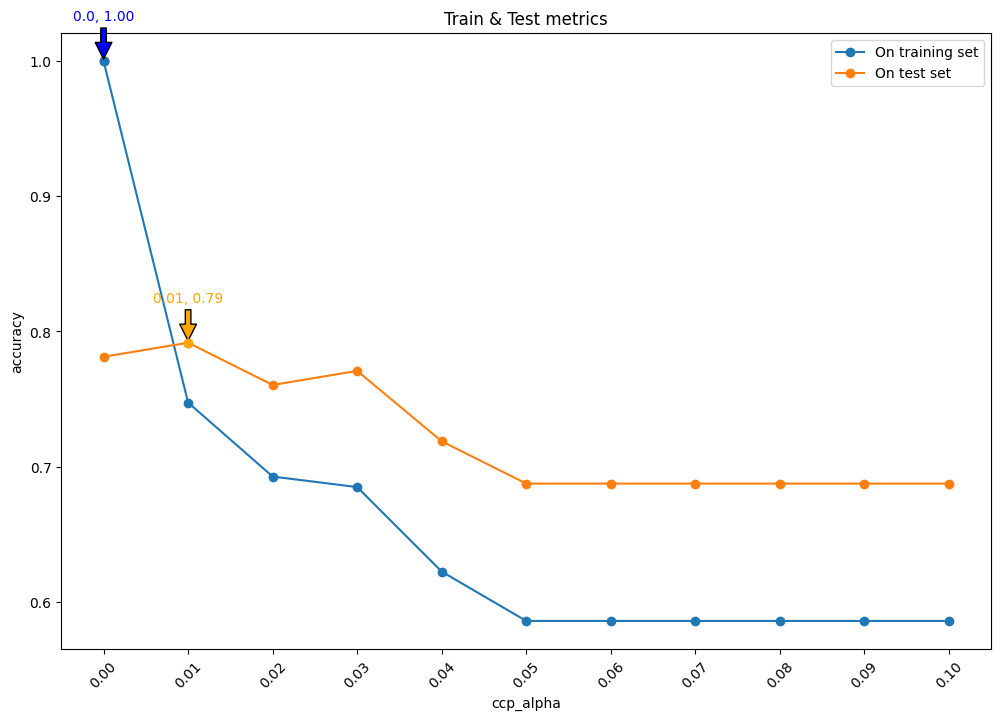

In [28]:
ccp_alpha_list = [0.10, 0.09, 0.08, 0.07, 0.06, 0.05, 0.04, 0.03, 0.02, 0.01, 0.00]
accuracy_list_train = []
accuracy_list_test = []
for ccp_alpha in ccp_alpha_list:
    model = RandomForestClassifier(ccp_alpha = ccp_alpha,
                                   random_state = RANDOM_STATE).fit(X_train,y_train,) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_test = model.predict(X_test) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_test = accuracy_score(predictions_test,y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_test.append(accuracy_test)

plot_graphs(accuracy_list_train, accuracy_list_test, ccp_alpha_list[:], 'Train & Test metrics', 'ccp_alpha', 'accuracy', )


### 3. class_weight: Weights associated with classes. It can be used to handle class imbalance.

Reasonable values: None (default), balanced, or a dictionary specifying weights for each class

### 4. criterion: The function to measure the quality of a split. Supported criteria are "gini" for the Gini impurity and "entropy" for the information gain.

Reasonable values: gini (default) or entropy

### 5. max_depth: The maximum depth of the tree. If None, nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

Reasonable values: None (default) or an integer between 5 and 15

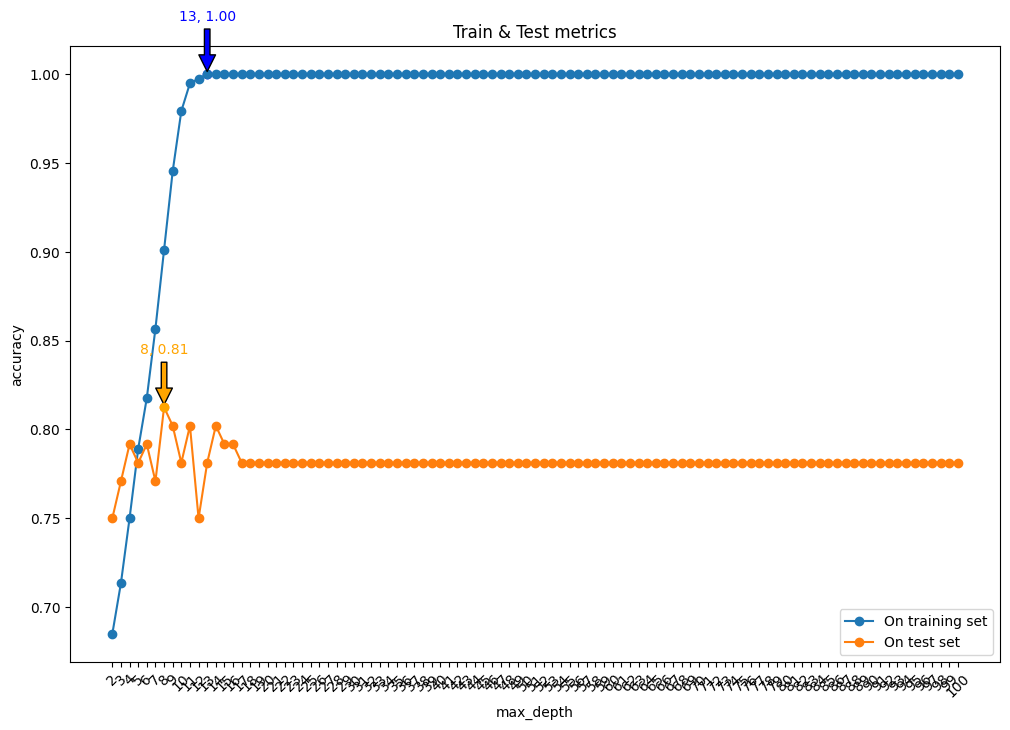

In [29]:
max_depth_list = [i for i in range(2, 101)] 
accuracy_list_train = []
accuracy_list_test = []
for max_depth in max_depth_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(max_depth = max_depth,
                                   random_state = RANDOM_STATE).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_test = model.predict(X_test) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_test = accuracy_score(predictions_test,y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_test.append(accuracy_test)

plot_graphs(accuracy_list_train, accuracy_list_test, max_depth_list, 'Train & Test metrics', 'max_depth', 'accuracy', )


### 6. max_features: The number of features to consider when looking for the best split.

Reasonable values: auto (default), sqrt, log2, or an integer between 1 and 65

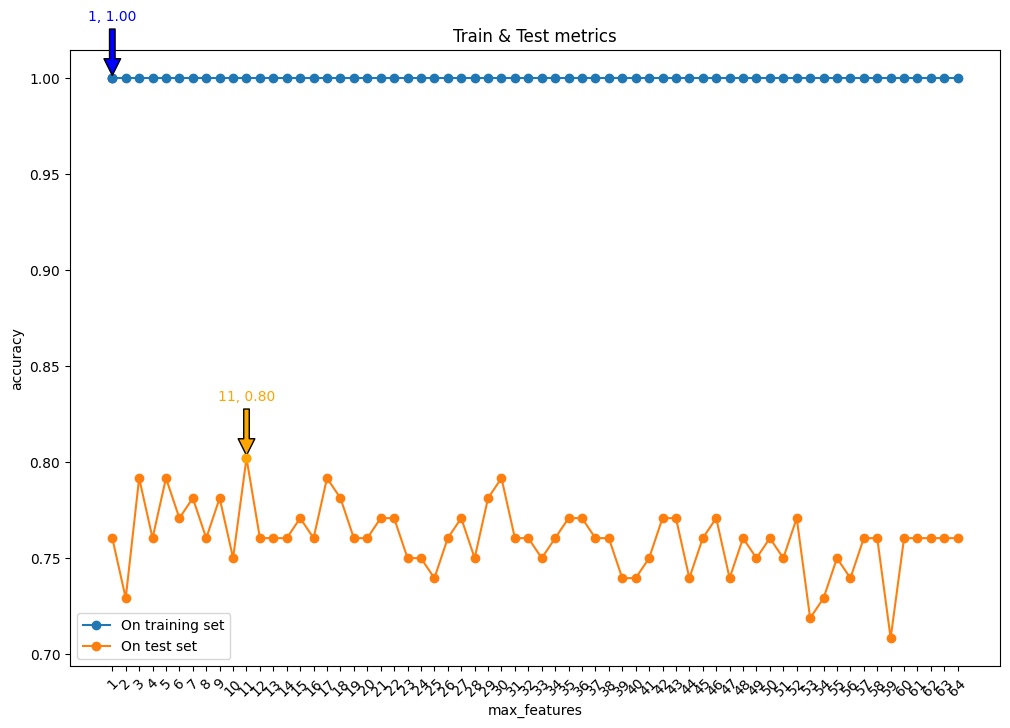

In [30]:
max_features_list = [i for i in range(1, 65)] 
accuracy_list_train = []
accuracy_list_test = []
for max_features in max_features_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(max_features = max_features,
                                   random_state = RANDOM_STATE).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_test = model.predict(X_test) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_test = accuracy_score(predictions_test,y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_test.append(accuracy_test)

plot_graphs(accuracy_list_train, accuracy_list_test, max_features_list, 'Train & Test metrics', 'max_features', 'accuracy', )


### 7. max_leaf_nodes: Grow trees with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity.

Reasonable values: None (default) or an integer between 10 and 100

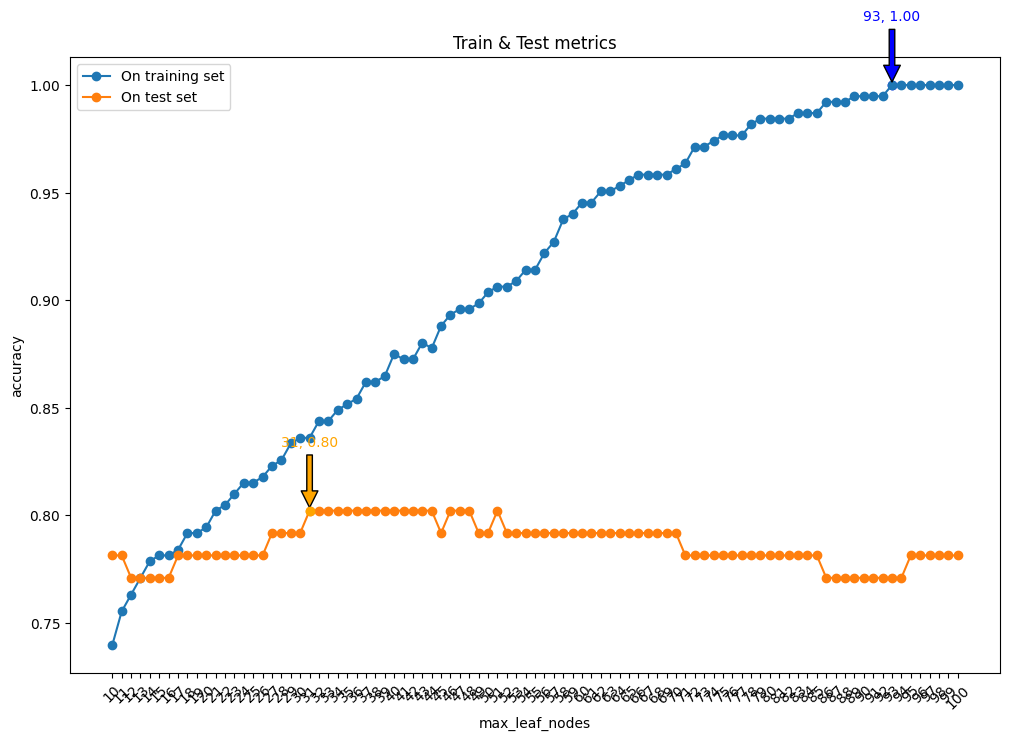

In [31]:
max_leaf_nodes_list = [i for i in range(10, 101)] 
accuracy_list_train = []
accuracy_list_test = []
for max_leaf_nodes in max_leaf_nodes_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(max_leaf_nodes = max_leaf_nodes,
                                   random_state = RANDOM_STATE).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_test = model.predict(X_test) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_test = accuracy_score(predictions_test,y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_test.append(accuracy_test)

plot_graphs(accuracy_list_train, accuracy_list_test, max_leaf_nodes_list, 'Train & Test metrics', 'max_leaf_nodes', 'accuracy', )


### 8. max_samples: The number of samples to draw from X to train each base estimator. If None, then draw X.shape[0] samples.

Reasonable values: None (default) or a float between 0.1 and 1.0

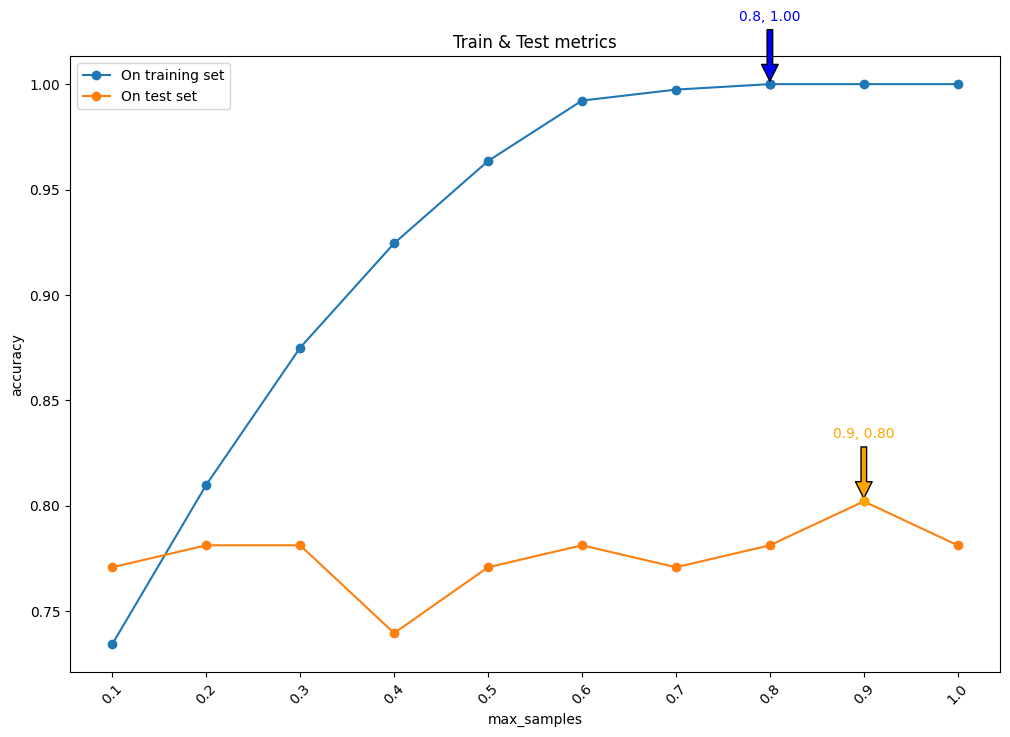

In [32]:
max_samples_list = [i for i in np.arange(0.1, 1.1, 0.1)] 
accuracy_list_train = []
accuracy_list_test = []
for max_samples in max_samples_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(max_samples = max_samples,
                                   random_state = RANDOM_STATE).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_test = model.predict(X_test) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_test = accuracy_score(predictions_test,y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_test.append(accuracy_test)

plot_graphs(accuracy_list_train, accuracy_list_test, max_samples_list, 'Train & Test metrics', 'max_samples', 'accuracy', )


### 9. min_impurity_decrease: A node will be split if this split induces a decrease of the impurity greater than or equal to this value.

Reasonable values: 0.0 (default) to 0.1

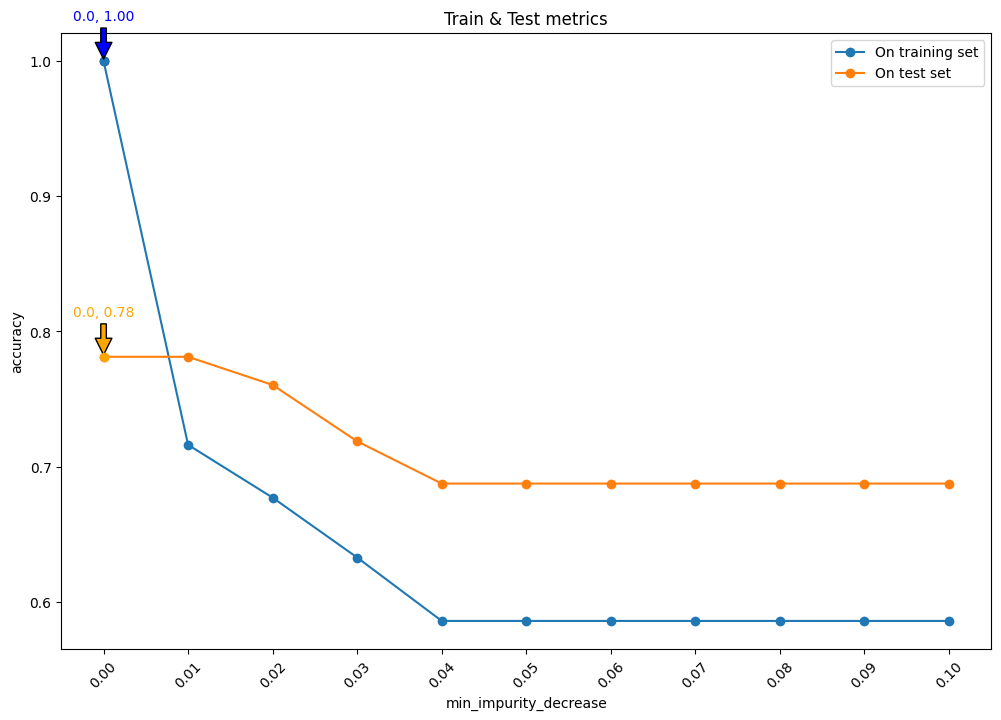

In [33]:
min_impurity_decrease_list = [i for i in np.arange(0.00, 0.11, 0.01)] 
accuracy_list_train = []
accuracy_list_test = []
for min_impurity_decrease in min_impurity_decrease_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(min_impurity_decrease = min_impurity_decrease,
                                   random_state = RANDOM_STATE).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_test = model.predict(X_test) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_test = accuracy_score(predictions_test,y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_test.append(accuracy_test)

plot_graphs(accuracy_list_train, accuracy_list_test, min_impurity_decrease_list, 'Train & Test metrics', 'min_impurity_decrease', 'accuracy', )


### 10. min_samples_leaf: The minimum number of samples required to be at a leaf node.

Reasonable values: 1 (default) to 10

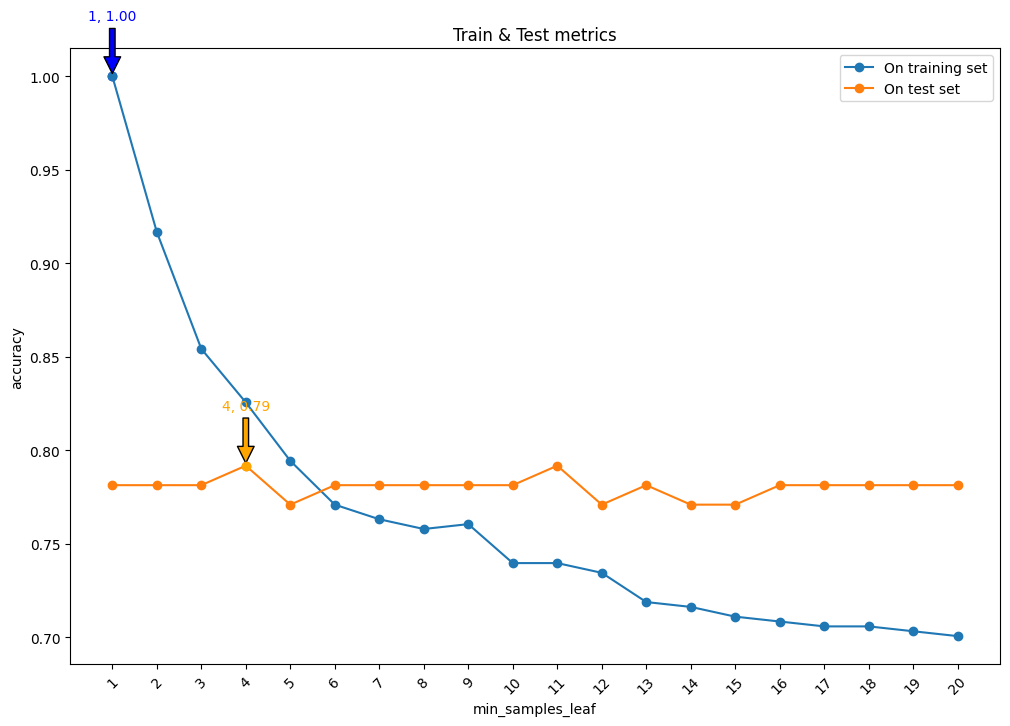

In [34]:
min_samples_leaf_list = [i for i in range(1, 21)] 
accuracy_list_train = []
accuracy_list_test = []
for min_samples_leaf in min_samples_leaf_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(min_samples_leaf = min_samples_leaf,
                                   random_state = RANDOM_STATE).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_test = model.predict(X_test) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_test = accuracy_score(predictions_test,y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_test.append(accuracy_test)

plot_graphs(accuracy_list_train, accuracy_list_test, min_samples_leaf_list, 'Train & Test metrics', 'min_samples_leaf', 'accuracy', )



### 11. min_samples_split: The minimum number of samples required to split an internal node.

Reasonable values: 2 (default) to 10

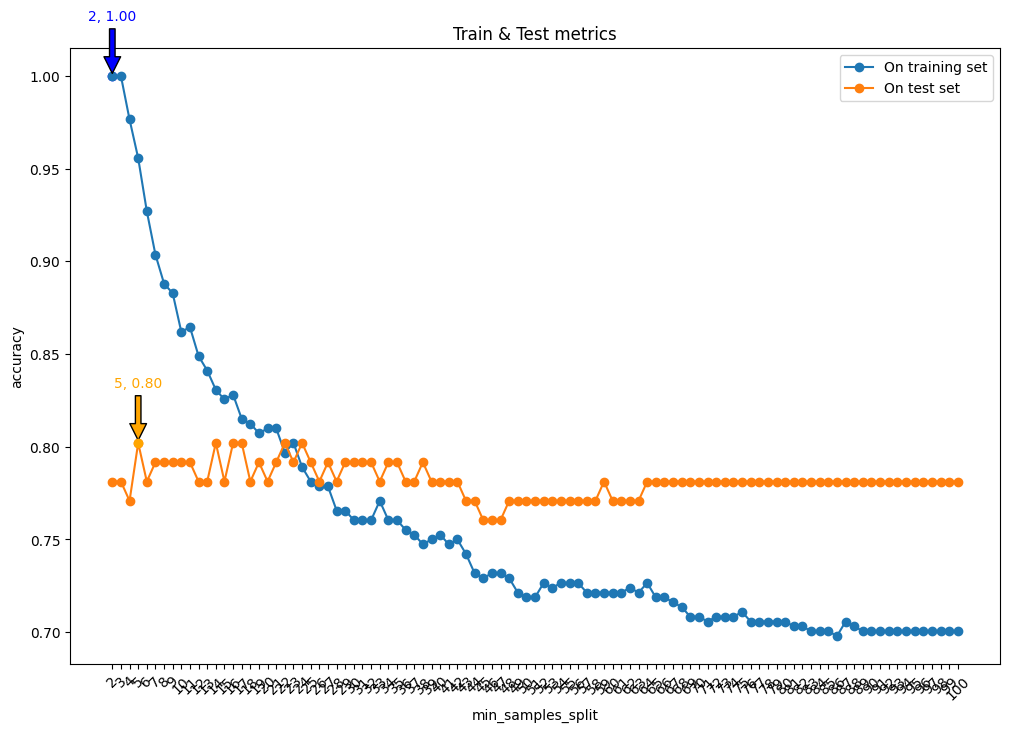

In [35]:
min_samples_split_list = [i for i in range(2, 101)]
accuracy_list_train = []
accuracy_list_test = []
for min_samples_split in min_samples_split_list:
    model = RandomForestClassifier(min_samples_split = min_samples_split,
                                   random_state = RANDOM_STATE).fit(X_train,y_train,) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_test = model.predict(X_test) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_test = accuracy_score(predictions_test,y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_test.append(accuracy_test)

plot_graphs(accuracy_list_train, accuracy_list_test, min_samples_split_list[:], 'Train & Test metrics', 'min_samples_split', 'accuracy', )


### 12. min_weight_fraction_leaf: The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node.

Reasonable values: 0.0 (default) to 0.1

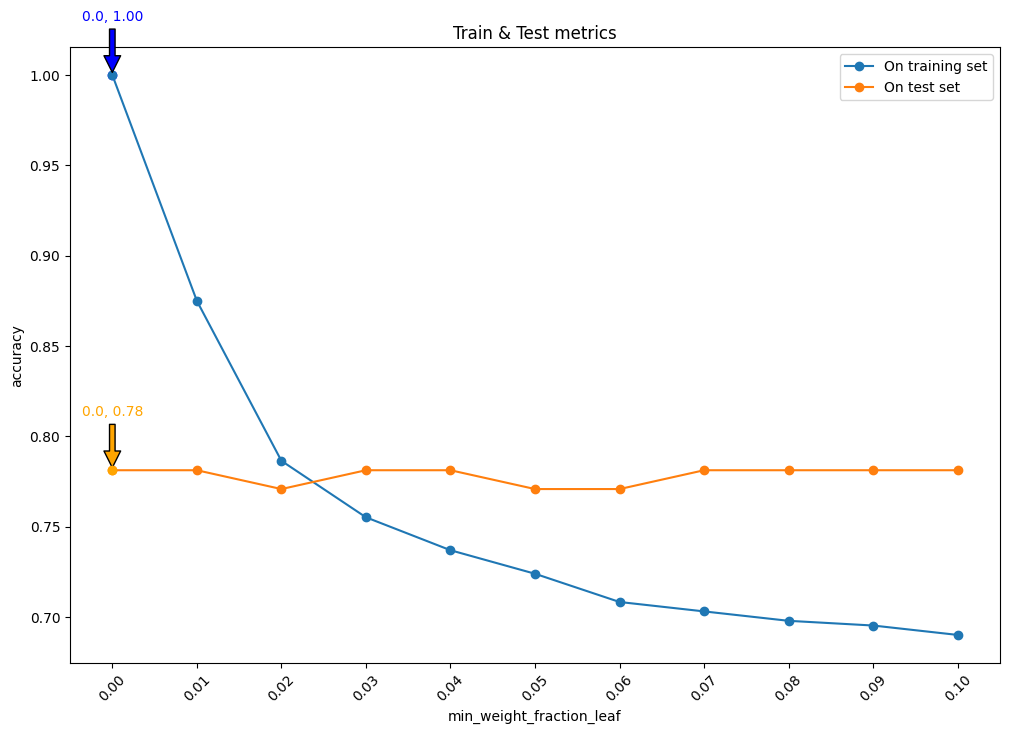

In [36]:
min_weight_fraction_leaf_list = [i for i in np.arange(0.00, 0.11, 0.01)]
accuracy_list_train = []
accuracy_list_test = []
for min_weight_fraction_leaf in min_weight_fraction_leaf_list:
    model = RandomForestClassifier(min_weight_fraction_leaf = min_weight_fraction_leaf,
                                   random_state = RANDOM_STATE).fit(X_train,y_train,) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_test = model.predict(X_test) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_test = accuracy_score(predictions_test,y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_test.append(accuracy_test)

plot_graphs(accuracy_list_train, accuracy_list_test, min_weight_fraction_leaf_list[:], 'Train & Test metrics', 'min_weight_fraction_leaf', 'accuracy', )


### 13. monotonic_cst: Monotonic constraint to ensure certain features always increase or decrease the output.

Reasonable values: Generally None for most cases

### 14. n_estimators: The number of trees in the forest.

Reasonable values: 10 to 100 (default is 100)


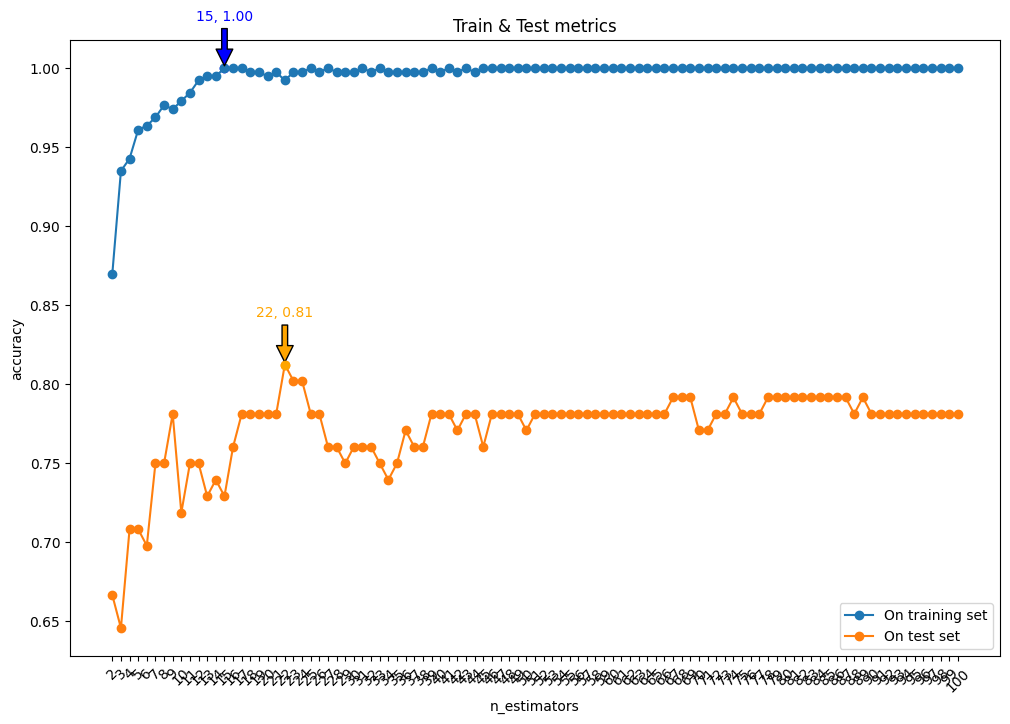

In [37]:
n_estimators_list = [i for i in range(2, 101)]
accuracy_list_train = []
accuracy_list_test = []
for n_estimators in n_estimators_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(n_estimators = n_estimators,
                                   random_state = RANDOM_STATE).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_test = model.predict(X_test) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_test = accuracy_score(predictions_test,y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_test.append(accuracy_test)

plot_graphs(accuracy_list_train, accuracy_list_test, n_estimators_list, 'Train & Test metrics', 'n_estimators', 'accuracy', )


### 15. n_jobs: The number of jobs to run in parallel. -1 means using all processors.

Reasonable values: 1 (default), or -1

### 16. oob_score: Whether to use out-of-bag samples to estimate the generalization accuracy.

Reasonable values: False (default) or True


### 17. random_state: Controls the randomness of the estimator. Pass an integer for reproducible results across multiple function calls.

Reasonable values: None (default) or an integer


### 18. verbose: Controls the verbosity of the tree building process.

Reasonable values: 0 (default) to 3

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

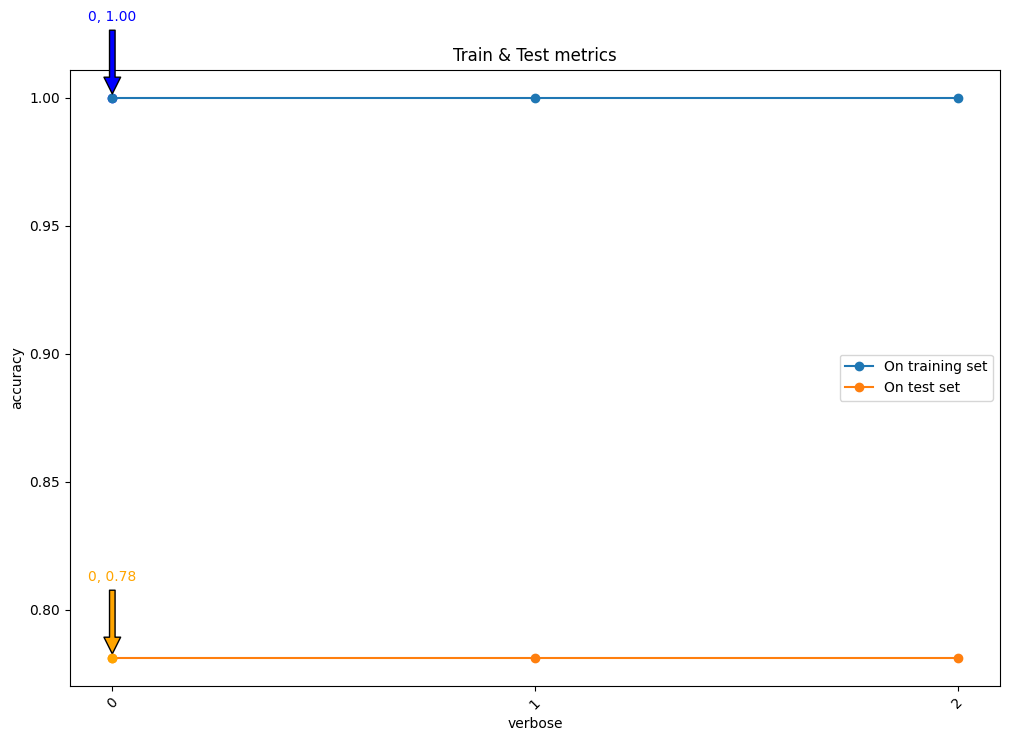

In [38]:
verbose_list = [i for i in range(0, 3)]
accuracy_list_train = []
accuracy_list_test = []
for verbose in verbose_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(verbose = verbose,
                                   random_state = RANDOM_STATE).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_test = model.predict(X_test) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_test = accuracy_score(predictions_test,y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_test.append(accuracy_test)

plot_graphs(accuracy_list_train, accuracy_list_test, verbose_list, 'Train & Test metrics', 'verbose', 'accuracy', )


### 19. warm_start: When set to True, reuse the solution of the previous call to fit and add more estimators to the ensemble.

Reasonable values: False (default) or True

# Regularization

1. Limiting Tree Depth
   - Hyperparameter: max_depth
   - Effect: Restricts the maximum depth of each decision tree in the forest.
   - Benefit: Reduces the complexity of individual trees, preventing them from overfitting the training data.
  
2. Minimum Samples for Splitting and Leaf Nodes
   - Hyperparameters: min_samples_split and min_samples_leaf
   - Effect: Controls the minimum number of samples required to split a node and to be at a leaf node.
   - Benefit: Ensures that nodes are not split too finely, which helps in reducing overfitting.
  
3. Maximum Number of Features
   - Hyperparameter: max_features
   - Effect: Limits the number of features considered for splitting at each node.
   - Benefit: Reduces the variance of the model by introducing randomness and reducing the correlation between individual trees.

4. Pruning
   - Hyperparameter: ccp_alpha
   - Effect: Applies cost-complexity pruning to remove nodes that provide little predictive power.
   - Benefit: Simplifies trees by removing branches that have little importance, thus reducing overfitting.
  
5. Using Bootstrapping
   - Hyperparameter: bootstrap
   - Effect: Uses bootstrapped samples (random sampling with replacement) to train each tree.
   - Benefit: Adds diversity to the individual trees, which reduces the variance of the model.

6. Controlling Tree Count
   - Hyperparameter: n_estimators
   - Effect: Sets the number of trees in the forest.
   - Benefit: Increasing the number of trees generally improves performance, but it also increases computation time. Finding the right balance is key.

7. Out-of-Bag (OOB) Error Estimation
   - Hyperparameter: oob_score
   - Effect: Uses out-of-bag samples to estimate the generalization error.
   - Benefit: Provides a way to validate the model without requiring a separate validation set, helping in assessing and preventing overfitting.

### Try all the combinations using GridSearchCV

In [39]:
# from sklearn.model_selection import GridSearchCV

# # Define the parameter grid
# param_grid = {
#     'bootstrap': [True, False],
#     'ccp_alpha': [i for i in np.arange(0.000, 0.030, 0.005)],
#     'lass_weight': ['None', 'balanced', 'balanced_subsample'],
#     'criterion': ['gini', 'entropy'],
#     'max_depth': [i for i in range(5, 15)],
#     'max_features': [i for i in range(8, 15)],
#     'max_leaf_nodes': [i for i in range(27, 35)],
#     'max_samples': [i for i in np.arange(0.10, 1.10, 0.01)],
#     'min_impurity_decrease': [i for i in np.arange(0.000, 0.020, 0.005)],
#     'min_samples_leaf': [i for i in range(3, 18)],
#     'min_samples_split': [i for i in range(2, 17)],
#     'min_weight_fraction_leaf': [i for i in np.arange(0.000, 0.030, 0.005)],
#     'monotonic_cst': ['None'],
#     'n_estimators': [i for i in range(17, 27)],
#     'n_jobs': [1, -1],
#     'oob_score': [False, True],
#     'random_state': [RANDOM_STATE],
#     'verbose': [0],
#     'warm_start': [False, True],
# }

# # Initialize the RandomForestClassifier
# model = RandomForestClassifier(random_state=RANDOM_STATE)

# # Initialize GridSearchCV with 5-fold cross-validation
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

# # Fit the model to the training data
# grid_search.fit(X_train, y_train)

# # Get the best hyperparameters and the best score
# best_params = grid_search.best_params_
# best_accuracy = grid_search.best_score_

# print(f"Best accuracy: {best_accuracy}")
# print(f"Best parameters: {best_params}")

# bootstrap = best_params['bootstrap']
# ccp_alpha = best_params['ccp_alpha']
# class_weight = best_params['class_weight']
# criterion = best_params['criterion']
# max_depth = best_params['max_depth']
# max_features = best_params['max_features']
# max_leaf_nodes = best_params['max_leaf_nodes']
# max_samples = best_params['max_samples']
# min_impurity_decrease = best_params['min_impurity_decrease']
# min_samples_leaf = best_params['min_samples_leaf']
# min_samples_split = best_params['min_samples_split']
# min_weight_fraction_leaf = best_params['min_weight_fraction_leaf']
# monotonic_cst = best_params['monotonic_cst']
# n_estimators = best_params['n_estimators']
# n_jobs = best_params['n_jobs']
# oob_score = best_params['oob_score']
# random_state = best_params['random_state']
# verbose = best_params['verbose']
# warm_start = best_params['warm_start']

### Use values for "max_depth", "min_samples_split", "n_estimators" which gave the best results for the test set

- max_depth = 10
- min_samples_split = 7
- n_estimators = 20

In [45]:
random_forest_model = RandomForestClassifier(bootstrap= True,
                                            ccp_alpha= 0.01,
                                            class_weight= 'balanced',
                                            criterion= 'entropy',
                                            max_depth= 8,
                                            max_features= 11,
                                            max_leaf_nodes= 31,
                                            max_samples= 0.9,
                                            min_impurity_decrease= 0,
                                            min_samples_leaf= 4,
                                            min_samples_split= 5,
                                            min_weight_fraction_leaf= 0,
                                            monotonic_cst= None,
                                            n_estimators= 22,
                                            n_jobs= 1,
                                            oob_score= True,
                                            random_state= RANDOM_STATE,
                                            verbose= 0,
                                            warm_start= True,
                                             
                                             ).fit(X_train,y_train)

/Users/vidurayashan/Library/Mobile Documents/com~apple~CloudDocs/6thSem/CO544/MachineLearningProject/Repo/CO544ProjectVenv/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:861: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(


In [46]:
training_accuracy_score_random_forest = accuracy_score(random_forest_model.predict(X_train),y_train)
testing_accuracy_score_random_forest = accuracy_score(random_forest_model.predict(X_test),y_test)
print(f"Training Accuracy score: {training_accuracy_score_random_forest:.4f}")
print(f"Testing Accuracy score: {testing_accuracy_score_random_forest:.4f}")

Training Accuracy score: 0.8255
Testing Accuracy score: 0.6979


## Feature Importance

Feature ranking:
1. Feature 34 (0.1305)
2. Feature 50 (0.0656)
3. Feature 35 (0.0652)
4. Feature 54 (0.0576)
5. Feature 49 (0.0562)
6. Feature 39 (0.0506)
7. Feature 30 (0.0499)
8. Feature 0 (0.0361)
9. Feature 33 (0.0333)
10. Feature 55 (0.0330)
11. Feature 44 (0.0264)
12. Feature 51 (0.0241)
13. Feature 45 (0.0211)
14. Feature 36 (0.0176)
15. Feature 31 (0.0158)
16. Feature 40 (0.0156)
17. Feature 29 (0.0156)
18. Feature 28 (0.0141)
19. Feature 26 (0.0134)
20. Feature 9 (0.0123)
21. Feature 5 (0.0121)
22. Feature 7 (0.0116)
23. Feature 37 (0.0110)
24. Feature 8 (0.0110)
25. Feature 15 (0.0109)
26. Feature 46 (0.0109)
27. Feature 21 (0.0108)
28. Feature 12 (0.0108)
29. Feature 47 (0.0102)
30. Feature 59 (0.0099)
31. Feature 42 (0.0095)
32. Feature 24 (0.0092)
33. Feature 53 (0.0092)
34. Feature 56 (0.0087)
35. Feature 32 (0.0079)
36. Feature 3 (0.0076)
37. Feature 43 (0.0075)
38. Feature 48 (0.0073)
39. Feature 6 (0.0060)
40. Feature 10 (0.0058)
41. Feature 11 (0.0057)
42. Feature 2 (

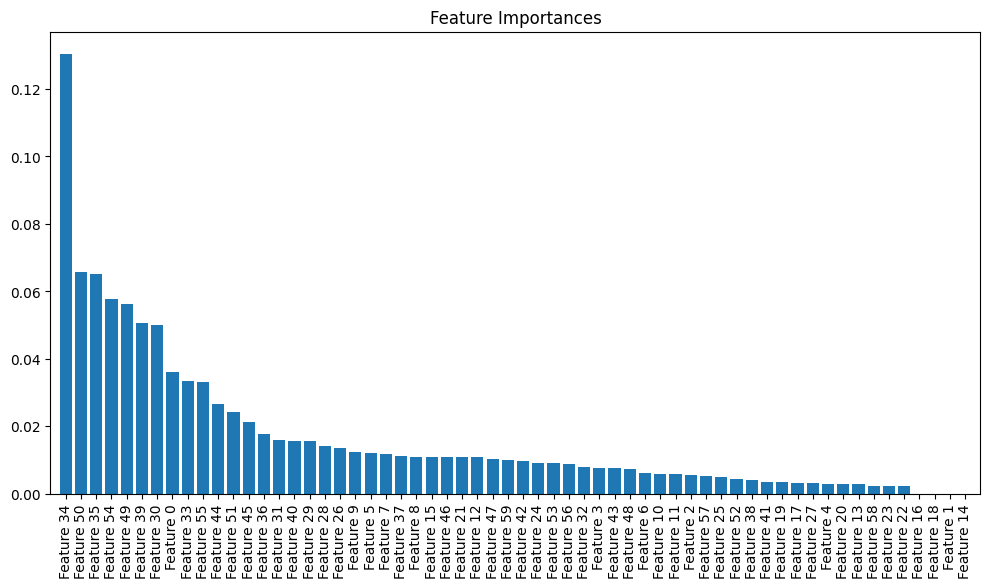

In [43]:
# Get feature importances
importances = random_forest_model.feature_importances_

# Get feature names if available (for this example, we'll use indices)
feature_names = [f'Feature {i}' for i in range(X_train.shape[1])]

# Sort features by importance
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for i in range(X_train.shape[1]):
    print(f"{i + 1}. {feature_names[indices[i]]} ({importances[indices[i]]:.4f})")

# Plot the feature importances
plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

## 4.3 XGoost


### Hyperparameters of XGBoost

In [ ]:
from xgboost import XGBClassifier

print("Number of hyperparameters in RandomForestClassifier: ", len(XGBClassifier().get_params()))
for item in (XGBClassifier().get_params()):
    print(item)

Number of hyperparameters in RandomForestClassifier:  39
objective
base_score
booster
callbacks
colsample_bylevel
colsample_bynode
colsample_bytree
device
early_stopping_rounds
enable_categorical
eval_metric
feature_types
gamma
grow_policy
importance_type
interaction_constraints
learning_rate
max_bin
max_cat_threshold
max_cat_to_onehot
max_delta_step
max_depth
max_leaves
min_child_weight
missing
monotone_constraints
multi_strategy
n_estimators
n_jobs
num_parallel_tree
random_state
reg_alpha
reg_lambda
sampling_method
scale_pos_weight
subsample
tree_method
validate_parameters
verbosity


### One interesting thing about the XGBoost is that during fitting, it can take in an evaluation dataset of the form `(X_val,y_val)`.

### For XGBoost numerical values are needed for the test set

In [ ]:
# # Function to convert Difficulty_levels to numerical values
# def target_to_numeric(target):
#     if target in 'low':
#         return 0
#     elif target is 'medium':
#         return 1
#     elif target is 'high':
#         return 2
#     else:
#         return None

# # Apply the function to the Difficulty_level column and create the new Difficulty_level_integer column
# data['Difficulty_level_integer'] = data['Difficulty_level'].apply(target_to_numeric)

# # Display the DataFrame
# #data.head(40)

In [ ]:
# Importing the XGBClassifier
from xgboost import XGBClassifier

# Define training and test sets again 
#X_train, X_test, y_train, y_test = train_test_split(features, data['Difficulty_level_integer'], train_size=0.8, random_state=RANDOM_STATE)  # 80% training and 20% testing

n = int(len(X_train)*0.8) ## Use 80% of training data to train and 20% to eval

# Set traing and evaluation sets for training data
X_train_fit, X_train_eval, y_train_fit, y_train_eval = X_train[:n], X_train[n:], y_train[:n], y_train[n:]

# Set early_stopping_rounds to 10 to avoid overfitting
xgb_model = XGBClassifier(n_estimators = 1000, learning_rate = 0.1,verbosity = 1, random_state = RANDOM_STATE)
xgb_model.fit(X_train_fit,y_train_fit, eval_set = [(X_train_eval,y_train_eval)], early_stopping_rounds = 10)

# To see the round with lowest evaluation metric
xgb_model.best_iteration

training_accuracy_score_xgboost = accuracy_score(xgb_model.predict(X_train),y_train)
testing_accuracy_score_xgboost = accuracy_score(xgb_model.predict(X_test),y_test)
print(f"Training Accuracy score: {training_accuracy_score_xgboost:.4f}")
print(f"Testing Accuracy score: {testing_accuracy_score_xgboost:.4f}")

[0]	validation_0-mlogloss:1.03923
[1]	validation_0-mlogloss:0.98618
[2]	validation_0-mlogloss:0.94332
[3]	validation_0-mlogloss:0.90852
[4]	validation_0-mlogloss:0.88501
[5]	validation_0-mlogloss:0.85699
[6]	validation_0-mlogloss:0.83005
[7]	validation_0-mlogloss:0.81012
[8]	validation_0-mlogloss:0.79473
[9]	validation_0-mlogloss:0.77977
[10]	validation_0-mlogloss:0.76856
[11]	validation_0-mlogloss:0.75624
[12]	validation_0-mlogloss:0.74603
[13]	validation_0-mlogloss:0.73675
[14]	validation_0-mlogloss:0.72816
[15]	validation_0-mlogloss:0.72082
[16]	validation_0-mlogloss:0.71393
[17]	validation_0-mlogloss:0.70446
[18]	validation_0-mlogloss:0.69942
[19]	validation_0-mlogloss:0.69244
[20]	validation_0-mlogloss:0.68939
[21]	validation_0-mlogloss:0.68608
[22]	validation_0-mlogloss:0.68416
[23]	validation_0-mlogloss:0.68469
[24]	validation_0-mlogloss:0.68037
[25]	validation_0-mlogloss:0.67915
[26]	validation_0-mlogloss:0.67871
[27]	validation_0-mlogloss:0.67785
[28]	validation_0-mlogloss:0.6

/Users/vidurayashan/Library/Mobile Documents/com~apple~CloudDocs/6thSem/CO544/MachineLearningProject/Repo/CO544ProjectVenv/lib/python3.12/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


## 5. Final Accuracy scores got for the test set so far

In [ ]:
# Create the resulting DataFrame using a list of dictionaries
Accuracy_scores_of_models = pd.DataFrame([
    {'Model': 'Random Forest', 'Accuracy': '79.17%'},
    {'Model': 'XGBoost', 'Accuracy': '77.08%'}
])

# Set the maximum width of the display to make it horizontally scrollable
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.width', 1000)

# Set the maximum column width to display all data in each cell
pd.set_option('display.max_colwidth', None)

# Display the DataFrame
display(Accuracy_scores_of_models)

,Model,Accuracy
0,Random Forest,79.17%
1,XGBoost,77.08%


Scikit Learn random forest implementation gives the best accuracy for now. These models should imrove more. For now I'm gonna compare Scikit Learn Random Forest implementation performances with other models.

## 6. Get the performance Metrics for the Scikit Learn Random Forest Implementation

              precision    recall  f1-score   support

           0       0.56      0.83      0.67        18
           1       0.84      0.71      0.77        66
           2       0.38      0.42      0.40        12

    accuracy                           0.70        96
   macro avg       0.59      0.65      0.61        96
weighted avg       0.73      0.70      0.70        96



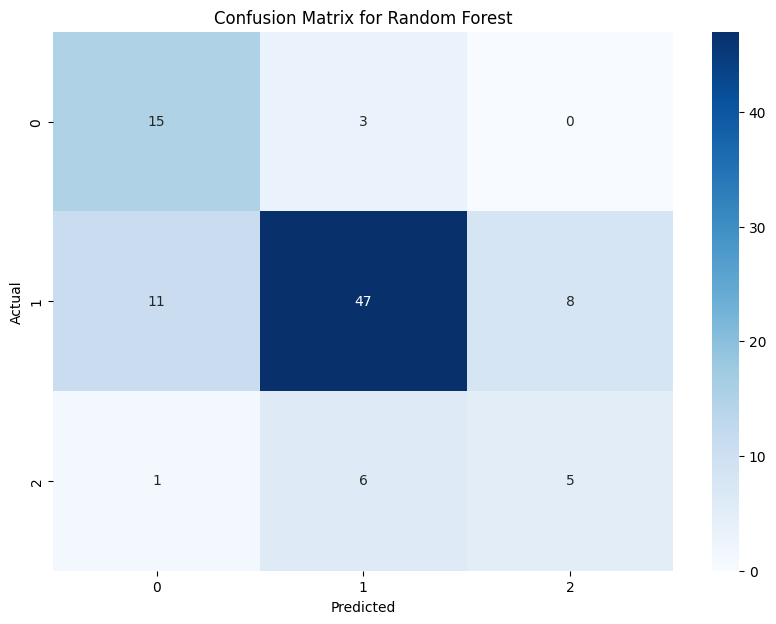

In [47]:
from sklearn.metrics import classification_report, confusion_matrix

#X_train, X_test, y_train, y_test = train_test_split(features, data['Difficulty_level'], train_size=0.8, random_state=RANDOM_STATE)  # 80% training and 20% testing

y_pred = random_forest_model.predict(X_test)


report = classification_report(y_test, y_pred)
print(report)

cm = confusion_matrix(y_test, y_pred)
#print(cm)

# Plot the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=random_forest_model.classes_, yticklabels=random_forest_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest')
plt.show()

################################################################################################################